In [3]:
import numpy as np
import pandas as pd
import random
import math
from scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
# Importing the dataset
dataset = pd.read_csv('Ads_Optimisation.csv')

In [225]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [226]:
print (len(dataset)) # trial number

10000


In [227]:
dataset.sum().reset_index(drop=True)

0    1703
1    1295
2     728
3    1196
4    2695
5     126
6    1112
7    2091
8     952
9     489
dtype: int64

In [228]:
# Random Selection

N = 10000 # trial
d = 10 # ad number

ads_selected = []
total_reward = 0

for n in range(0, N):
    ad = random.randrange(d) # one random ad
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [229]:
print(total_reward)

1269


In [231]:
pd.Series(ads_selected).tail(2000).value_counts()

2    226
0    226
9    201
8    201
1    197
5    196
4    190
3    190
7    188
6    185
dtype: int64

### e-greedy

In [238]:
N = 10000 # trial
d = 10 # ad number

ads_selected = []
total_reward = 0
numbers_of_selections = [1] * d
sums_of_reward = [1] * d
average_reward = []

# parameter
eps = 0.1

for n in range(0, N):
    # flip the coin
    if bernoulli.rvs(eps, size=1)[0] == 0: # explore
        ad = random.randrange(d)
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        numbers_of_selections[ad] += 1
        sums_of_reward[ad] += reward
        total_reward += reward
                
# exploit
for i in range(0, d):
    average_reward.append(sums_of_reward[i] / numbers_of_selections[i])
    mean_best_ad = pd.Series(average_reward).sort_values(ascending=False).index[0]
    rest_n = n - len(ads_selected)
    rest_reward = dataset.values[rest_n:, mean_best_ad].sum()

final_reward = total_reward + rest_reward

In [239]:
print(final_reward)

3563


In [240]:
pd.Series(ads_selected).head(2000).value_counts()

4    228
7    213
1    212
9    205
2    199
5    197
8    189
3    186
0    186
6    185
dtype: int64

In [243]:
len(ads_selected)

9021

In [244]:
rest_n

978

In [242]:
mean_best_ad

4

### Upper Confidence Bound
- https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/

In [245]:
# Implementing UCB

N = 10000 # trial
d = 10 # ad number

ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

In [246]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [247]:
print(total_reward)

2125


In [248]:
pd.Series(ads_selected).head(2000).value_counts()

4    547
7    313
0    216
3    163
8    156
1    156
6    134
2    122
9    105
5     88
dtype: int64

### Thompson Sampling

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
- https://github.com/chris-chris/bandits-baseline/blob/master/beta.py

banner1: [0.76218994]
banner2: [0.11852103]
banner3: [0.55008779]


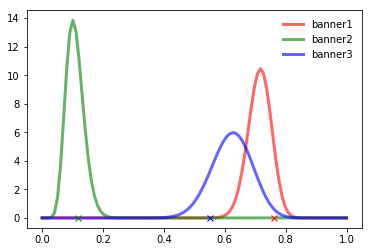

In [8]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 100)

## a,b param setting
# the first postion: click
# the second position: no click
ck_1, nock_1 = 100, 40
ck_2, nock_2 = 12, 99
ck_3, nock_3 = 33, 20

ax.plot(x, beta.pdf(x, ck_1, nock_1), 'r-', lw=3, alpha=0.6, label='banner1')
ax.plot(x, beta.pdf(x, ck_2, nock_2), 'g-', lw=3, alpha=0.6, label='banner2')
ax.plot(x, beta.pdf(x, ck_3, nock_3), 'b-', lw=3, alpha=0.6, label='banner3')

banner1_rvs = beta.rvs(ck_1, nock_1, size=1)
banner2_rvs = beta.rvs(ck_2, nock_2, size=1)
banner3_rvs = beta.rvs(ck_3, nock_3, size=1)

print("banner1:", banner1_rvs)
print("banner2:", banner2_rvs)
print("banner3:", banner3_rvs)

ax.plot(banner1_rvs, 0, 'x', color='red')
ax.plot(banner2_rvs, 0, 'x', color='green')
ax.plot(banner3_rvs, 0, 'x', color='blue')

ax.legend(loc='best', frameon=False)
plt.show()